In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_excel("data/titanic3.xls")

# change names
df = df.rename(columns={'pclass': 'Passenger Class', 'survived': 'Survived', 'age': 'Age', 'sibsp': 'Siblings/spouses aboard', 'parch': 'Parents/children aboard', 'fare': 'Passenger fare', 'embarked': 'Port of Embarkation', 'home.dest': 'Home/Destination'})
# create binary columns for sex and alone
df['sex'] = df['sex'].apply(lambda x: 0 if str(x) == 'male' else 1)
df['alone'] = df.apply(lambda row: 1 if row['Parents/children aboard'] == 0 and row['Siblings/spouses aboard'] == 0 else 0, axis=1)
# fill null values for age and fare
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df['Passenger fare'].fillna(value=df['Passenger fare'].mean(), inplace=True)
# drop unused columns
df.drop(['cabin', 'boat', 'body', 'ticket', 'name', 'Port of Embarkation', 'Home/Destination'], axis=1, inplace=True)

#change order of columns
new_order = ['sex', 'Survived', 'alone', 'Siblings/spouses aboard', 'Parents/children aboard', 'Passenger fare']
df = df[new_order]

df.head(5)

,sex,Survived,alone,Siblings/spouses aboard,Parents/children aboard,Passenger fare
0,1,1,1,0,0,211.3375
1,0,1,0,1,2,151.5500
2,1,0,0,1,2,151.5500
3,0,0,0,1,2,151.5500
4,1,0,0,1,2,151.5500


<AxesSubplot: >

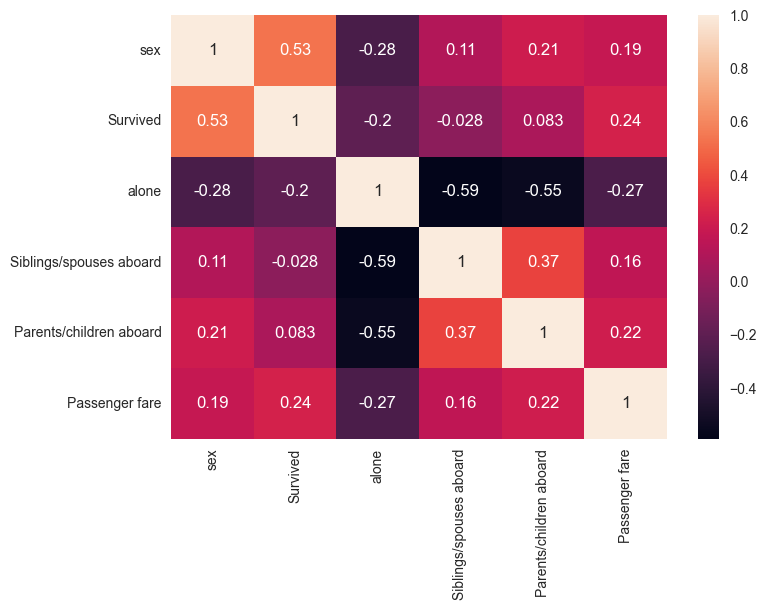

In [13]:
#we look at the correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [14]:
#the sex and survived are fairly positive correlated
from pycaret.classification import *
s = setup(df, target = 'Survived', session_id=123)

best_survived = compare_models()

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(1309, 6)"
4,Transformed data shape,"(1309, 6)"
5,Transformed train set shape,"(916, 6)"
6,Transformed test set shape,"(393, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7871,0.8093,0.6857,0.7443,0.7110,0.5432,0.5470,0.0050
gbc,Gradient Boosting Classifier,0.7860,0.8446,0.6543,0.7567,0.6997,0.5352,0.5403,0.0260
ada,Ada Boost Classifier,0.7849,0.8301,0.6914,0.7351,0.7096,0.5396,0.5429,0.0180
lightgbm,Light Gradient Boosting Machine,0.7849,0.8377,0.6857,0.7387,0.7088,0.5390,0.5421,0.0760
lr,Logistic Regression,0.7838,0.8178,0.6657,0.7472,0.7016,0.5332,0.5376,0.0060
rf,Random Forest Classifier,0.7838,0.8266,0.6800,0.7371,0.7062,0.5357,0.5380,0.0490
ridge,Ridge Classifier,0.7827,0.0000,0.6686,0.7400,0.7011,0.5313,0.5342,0.0080
lda,Linear Discriminant Analysis,0.7827,0.8189,0.6686,0.7400,0.7011,0.5313,0.5342,0.0040
dt,Decision Tree Classifier,0.7795,0.7745,0.6543,0.7431,0.6938,0.5228,0.5272,0.0050
et,Extra Trees Classifier,0.7751,0.7962,0.6514,0.7303,0.6879,0.5132,0.5158,0.0390


In [17]:
print(best_survived)
tune_model(best_survived)

evaluate_model(best_survived)

#predict_model(best)
predict_model(best_survived, data=df.head(10))

save_model(best_survived, 'my_best_pipeline_survived')

GaussianNB(priors=None, var_smoothing=1e-09)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8152,0.8644,0.8000,0.7368,0.7671,0.6144,0.6158
1,0.8043,0.8145,0.7143,0.7576,0.7353,0.5803,0.5810
2,0.7500,0.7747,0.7429,0.6500,0.6933,0.4839,0.4870
3,0.7826,0.7777,0.6571,0.7419,0.6970,0.5284,0.5308
4,0.8043,0.7677,0.6571,0.7931,0.7188,0.5708,0.5767
5,0.8043,0.8231,0.6857,0.7742,0.7273,0.5756,0.5782
6,0.7033,0.7579,0.5714,0.6250,0.5970,0.3630,0.3639
7,0.8242,0.8758,0.6286,0.8800,0.7333,0.6075,0.6267
8,0.8022,0.8444,0.7143,0.7576,0.7353,0.5776,0.5783


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6000,0.4600,0.8000,0.5714,0.6667,0.2000,0.2182


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sex', 'alone',
                                              'Siblings/spouses aboard',
                                              'Parents/children aboard',
                                              'Passenger fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 (

In [16]:
# # Predicting the sex
# from pycaret.classification import *
# s = setup(df, target = 'sex', session_id=123)

# best_sex = compare_models()

# print(best_sex)

# evaluate_model(best_sex)

# #predict_model(best)
# predict_model(best_sex, data=df.head(10))

# save_model(best_sex, 'my_best_pipeline_sex')